In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.utils.multiclass import unique_labels
# import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#os.chdir(r'N:\STOCK ADVISOR BOT')

In [2]:

def prepare_lagged_features(df_Stock, lag_stock =20, lag_index =5):

        print('Preparing Lagged Features for Stock, Index Funds.....')
        lags = range(1, lag_stock+1)
        lag_cols= ['Close']
        df_Stock=df_Stock.assign(**{
            '{}(t-{})'.format(col, l): df_Stock[col].shift(l)
            for l in lags
            for col in lag_cols
        })

       
        lags = range(1, lag_index+1)
        lag_cols= ['QQQ_Close','SnP_Close','DJIA_Close']
        df_Stock= df_Stock.assign(**{
            '{}(t-{})'.format(col, l): df_Stock[col].shift(l)
            for l in lags
            for col in lag_cols
        })

        df_Stock = df_Stock.drop(columns=lag_cols)


        remove_lags_na = max(lag_stock, lag_index) + 1
        print('Removing NAN rows - ', str(remove_lags_na))
        df_Stock = df_Stock.iloc[remove_lags_na:,]
        return df_Stock

    
    
def get_mape(y_true, y_pred): 
        """
        Compute mean absolute percentage error (MAPE)
        """
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

'''
for i in range(4):
    print(i)
    #name='v'+str(i)
    locals()['v'+str(i)]=i+i
    print(locals()['v'+str(i)])
'''


"\nfor i in range(4):\n    print(i)\n    #name='v'+str(i)\n    locals()['v'+str(i)]=i+i\n    print(locals()['v'+str(i)])\n"

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 35, 250)           252000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0043
Epoch 2/25
494/494 - 15s - loss: 0.0017
Epoch 3/25
494/494 - 16s - loss: 0.0015
Epoch 4/25
494/494 - 15s - loss: 0.0017
Epoch 5/25
494/494 - 14s - loss: 0.0012
Epoch 6/25
494/494 - 14s - loss: 0.0013
Epoch 7/25
494/494 - 14s - loss: 0.0012
Epoch 8/25


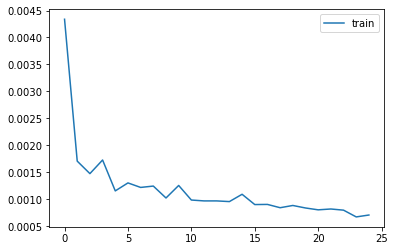

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 35, 250)           252000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0082
Epoch 2/25
494/494 - 14s - loss: 0.0037
Epoch 3/25
494/494 - 14s - loss: 0.0033
Epoch 4/25
494/494 - 14s - loss: 0.0030
Epoch 5/25
494/494 - 14s - loss: 0.0031
Epoch 6/25
494/494 - 15s - loss: 0.0027
Epoch 7/25
494/494 - 14s - loss: 0.0026
Epoch 8/25


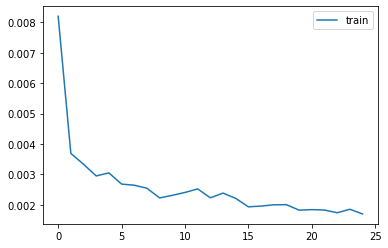

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 35, 250)           252000    
_________________________________________________________________
lstm_7 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0090
Epoch 2/25
494/494 - 14s - loss: 0.0045
Epoch 3/25
494/494 - 14s - loss: 0.0038
Epoch 4/25
494/494 - 14s - loss: 0.0039
Epoch 5/25
494/494 - 14s - loss: 0.0035
Epoch 6/25
494/494 - 15s - loss: 0.0035
Epoch 7/25
494/494 - 15s - loss: 0.0037
Epoch 8/25
4

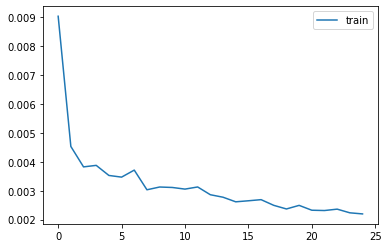

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 35, 250)           252000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0064
Epoch 2/25
494/494 - 14s - loss: 0.0025
Epoch 3/25
494/494 - 15s - loss: 0.0023
Epoch 4/25
494/494 - 14s - loss: 0.0021
Epoch 5/25
494/494 - 14s - loss: 0.0021
Epoch 6/25
494/494 - 14s - loss: 0.0020
Epoch 7/25
494/494 - 14s - loss: 0.0017
Epoch 8/25
49

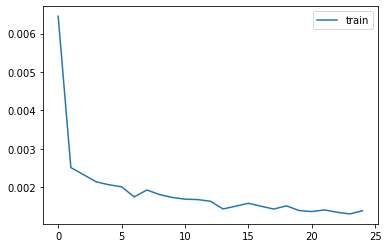

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 18s - loss: 0.0103
Epoch 2/25
494/494 - 16s - loss: 0.0060
Epoch 3/25
494/494 - 17s - loss: 0.0047
Epoch 4/25
494/494 - 17s - loss: 0.0044
Epoch 5/25
494/494 - 14s - loss: 0.0042
Epoch 6/25
494/494 - 14s - loss: 0.0042
Epoch 7/25
494/494 - 14s - loss: 0.0042
Epoch 8/25


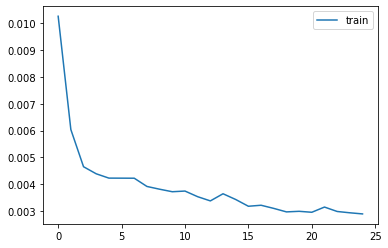

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_13 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 19s - loss: 0.0061
Epoch 2/25
494/494 - 16s - loss: 0.0024
Epoch 3/25
494/494 - 14s - loss: 0.0024
Epoch 4/25
494/494 - 14s - loss: 0.0024
Epoch 5/25
494/494 - 14s - loss: 0.0022
Epoch 6/25
494/494 - 14s - loss: 0.0019
Epoch 7/25
494/494 - 14s - loss: 0.0021
Epoch 8/25


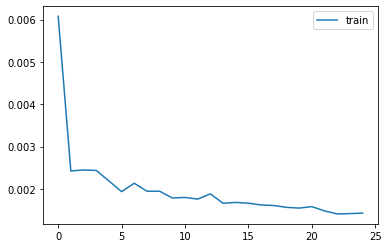

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_15 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0075
Epoch 2/25
494/494 - 14s - loss: 0.0028
Epoch 3/25
494/494 - 15s - loss: 0.0022
Epoch 4/25
494/494 - 15s - loss: 0.0024
Epoch 5/25
494/494 - 15s - loss: 0.0020
Epoch 6/25
494/494 - 17s - loss: 0.0021
Epoch 7/25
494/494 - 19s - loss: 0.0021
Epoch 8/25


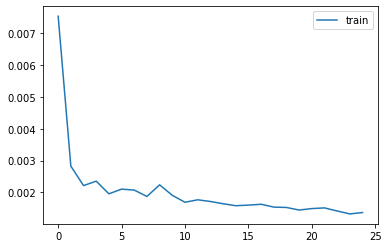

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_17 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0051
Epoch 2/25
494/494 - 14s - loss: 0.0024
Epoch 3/25
494/494 - 14s - loss: 0.0020
Epoch 4/25
494/494 - 16s - loss: 0.0018
Epoch 5/25
494/494 - 14s - loss: 0.0019
Epoch 6/25
494/494 - 14s - loss: 0.0017
Epoch 7/25
494/494 - 14s - loss: 0.0017
Epoch 8/25


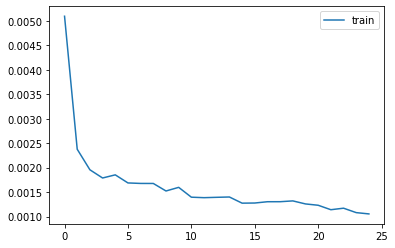

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_19 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 17s - loss: 0.0068
Epoch 2/25
494/494 - 14s - loss: 0.0036
Epoch 3/25
494/494 - 15s - loss: 0.0034
Epoch 4/25
494/494 - 17s - loss: 0.0029
Epoch 5/25
494/494 - 16s - loss: 0.0029
Epoch 6/25
494/494 - 17s - loss: 0.0029
Epoch 7/25
494/494 - 17s - loss: 0.0029
Epoch 8/25


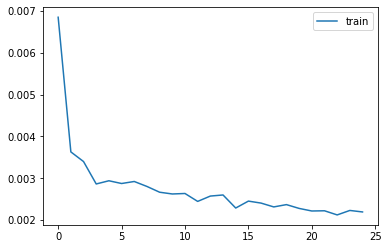

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 35, 250)           252000    
_________________________________________________________________
lstm_21 (LSTM)               (None, 250)               501000    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 251       
Total params: 753,251
Trainable params: 753,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
494/494 - 16s - loss: 0.0071
Epoch 2/25
494/494 - 14s - loss: 0.0026
Epoch 3/25
494/494 - 14s - loss: 0.0021
Epoch 4/25
494/494 - 14s - loss: 0.0020
Epoch 5/25
494/494 - 14s - loss: 0.0023
Epoch 6/25
494/494 - 14s - loss: 0.0021
Epoch 7/25
494/494 - 14s - loss: 0.0018
Epoch 8/25

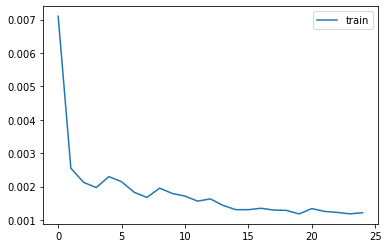

In [4]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-7)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[:L,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L:,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=250))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

# This is prediction result

In [6]:
#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']


dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['ClosePreNEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['ClosePreDUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['ClosePreSO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['ClosePreD'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['ClosePreEXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['ClosePreAEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['ClosePreSRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['ClosePreXEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['ClosePrePEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['ClosePreWEC'])

In [9]:
TEST = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)

In [10]:
TEST

ClosePreNEE  ClosePreDUK  ClosePreSO  ClosePreD  ClosePreEXC  \
0      47.378838    83.431984   52.528709  74.269646    42.890217   
1      47.684319    83.749580   52.630726  74.583267    42.905762   
2      47.662243    83.899178   52.665100  74.707100    42.952435   
3      47.824249    84.344688   52.701553  74.825020    43.000076   
4      47.739483    84.669655   52.618546  74.799805    43.069950   
..           ...          ...         ...        ...          ...   
611    83.858322    95.036865   60.179398  82.413666    41.627823   
612    84.586380    95.243973   60.521255  82.952171    41.640518   
613    84.910576    95.316139   60.753807  83.298668    41.660484   
614    84.625305    95.353638   60.949314  83.591545    41.682663   
615    84.967056    95.368225   61.078896  83.776337    41.682213   

     ClosePreAEP  ClosePreSRE  ClosePreXEL  ClosePrePEG  ClosePreWEC  
0      75.096275   120.850929    50.672295    51.534897    67.367508  
1      75.295525   121.327766    50.896797    51.574982    67.526123  
2      75.404282   121.585037    50.827084    51.574318    67.598282  
3      75.433510   121.794258    51.042835    51.584644    67.513092  
4      75.448021   121.838005    51.043755    51.550579    67.593346  
..           ...          ...          ...          ...          ...  
611    80.705620   163.329132    65.104652    58.053593    84.601730  
612    82.492661   164.830811    65.799675    58.208664    83.501442  
613    83.135918   165.870804    65.862175    58.317791    82.873550  
614    83.244484   166.864059    65.935188    58.414043    84.125259  
615    83.308800   167.561707    65.928085    58.550350    83.334099  

[616 rows x 10 columns]

In [11]:
#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']

NEE_daily_returns = TEST['ClosePreNEE'].pct_change()
DUK_daily_returns = TEST['ClosePreDUK'].pct_change()

SO_daily_returns = TEST['ClosePreSO'].pct_change()
D_daily_returns = TEST['ClosePreD'].pct_change()

EXC_daily_returns = TEST['ClosePreEXC'].pct_change()
AEP_daily_returns = TEST['ClosePreAEP'].pct_change()

SRE_daily_returns = TEST['ClosePreSRE'].pct_change()
XEL_daily_returns = TEST['ClosePreXEL'].pct_change()

PEG_daily_returns = TEST['ClosePrePEG'].pct_change()
WEC_daily_returns = TEST['ClosePreWEC'].pct_change()

In [20]:
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()

In [21]:
#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
TESTDailyReturn = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)

In [31]:
TESTDailyReturn.max()

ClosePreNEE    0.062596
ClosePreDUK    0.088595
ClosePreSO     0.023899
ClosePreD      0.046896
ClosePreEXC    0.019421
ClosePreAEP    0.033040
ClosePreSRE    0.044328
ClosePreXEL    0.022301
ClosePrePEG    0.132990
ClosePreWEC    0.099090
dtype: float32

In [12]:
#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()

In [13]:
#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

In [14]:
#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
TESTCUM = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)

ClosePreNEE  ClosePreDUK  ClosePreSO  ClosePreD  ClosePreEXC  \
0            NaN          NaN         NaN        NaN          NaN   
1       1.006448     1.003807    1.001942   1.004223     1.000362   
2       1.005982     1.005600    1.002597   1.005890     1.001451   
3       1.009401     1.010939    1.003291   1.007478     1.002561   
4       1.007612     1.014835    1.001710   1.007138     1.004190   
..           ...          ...         ...        ...          ...   
611     1.769956     1.139094    1.145647   1.109657     0.970568   
612     1.785323     1.141577    1.152155   1.116908     0.970864   
613     1.792166     1.142442    1.156582   1.121573     0.971329   
614     1.786145     1.142891    1.160304   1.125516     0.971847   
615     1.793358     1.143066    1.162771   1.128005     0.971836   

     ClosePreAEP  ClosePreSRE  ClosePreXEL  ClosePrePEG  ClosePreWEC  
0            NaN          NaN          NaN          NaN          NaN  
1       1.002653     1.003946     1.004431     1.000778     1.002355  
2       1.004102     1.006075     1.003055     1.000765     1.003426  
3       1.004491     1.007806     1.007313     1.000965     1.002161  
4       1.004684     1.008168     1.007331     1.000304     1.003352  
..           ...          ...          ...          ...          ...  
611     1.074696     1.351493     1.284820     1.126492     1.255823  
612     1.098493     1.363919     1.298536     1.129501     1.239490  
613     1.107058     1.372524     1.299769     1.131618     1.230170  
614     1.108504     1.380743     1.301210     1.133486     1.248750  
615     1.109361     1.386516     1.301070     1.136131     1.237006  

[616 rows x 10 columns]

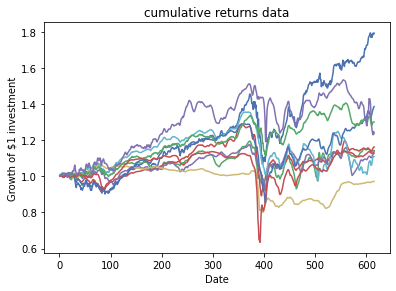

In [17]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

ax1.plot(NEE_cum_returns)
ax1.plot(DUK_cum_returns)
ax1.plot(SO_cum_returns)
ax1.plot(D_cum_returns)
ax1.plot(EXC_cum_returns)
ax1.plot(AEP_cum_returns)
ax1.plot(SRE_cum_returns)
ax1.plot(XEL_cum_returns)
ax1.plot(PEG_cum_returns)
ax1.plot(WEC_cum_returns)


ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("cumulative returns data")
plt.show()

In [15]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

In [16]:
import plotly.express as px

In [23]:

atx_comps_returns = TESTDailyReturn
atx_comps_rets_cumprod = TESTCUM 

In [24]:
fig = px.line(atx_comps_rets_cumprod, x=atx_comps_rets_cumprod.index, y=atx_comps_rets_cumprod.columns, title='Cumulative Returns of ATX Stocks (2010-2020)')

fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()

In [53]:
train = atx_comps_returns[:500]
test = atx_comps_returns[500:]

'''
avg_returns = expected_returns.mean_historical_return(prices)
        cov_mat = risk_models.sample_cov(prices)
 '''   
mu = expected_returns.ema_historical_return(atx_comps_returns, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns, returns_data = True, span = 180)

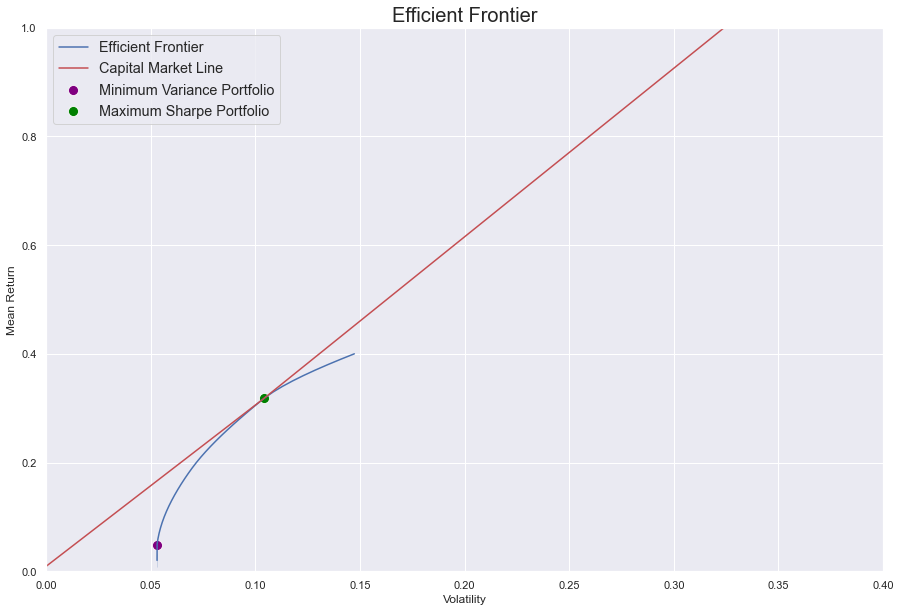

In [59]:

ret_ef = np.arange(0, 0.41, 0.01)
vol_ef = []
for i in np.arange(0, 0.41, 0.01):
    ef = EfficientFrontier(mu, Sigma)
    ef.efficient_return(i)
    vol_ef.append(ef.portfolio_performance()[1])

ef = EfficientFrontier(mu, Sigma)
ef.min_volatility()
min_vol_ret = ef.portfolio_performance()[0]
min_vol_vol = ef.portfolio_performance()[1]

ef.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef.portfolio_performance()[0]
max_sharpe_vol = ef.portfolio_performance()[1]



sns.set()

fig, ax = plt.subplots(figsize = [15,10])

sns.lineplot(x = vol_ef, y = ret_ef, label = "Efficient Frontier", ax = ax)
sns.scatterplot(x = [min_vol_vol], y = [min_vol_ret], ax = ax, label = "Minimum Variance Portfolio", color = "purple", s = 100)
sns.scatterplot(x = [max_sharpe_vol], y = [max_sharpe_ret], ax = ax, label = "Maximum Sharpe Portfolio", color = "green", s = 100)
sns.lineplot(x = [0, max_sharpe_vol, 1], y = [0.009, max_sharpe_ret, 3.096], label = "Capital Market Line", ax = ax, color = "r")

ax.set(xlim = [0, 0.4])
ax.set(ylim = [0, 1])
ax.set_xlabel("Volatility")
ax.set_ylabel("Mean Return")
plt.legend(fontsize='large')
plt.title("Efficient Frontier", fontsize = '20')

ax.figure.savefig("EffFront_big.png", dpi = 300)

Expected annual return: 4.8%
Annual volatility: 5.3%
Sharpe Ratio: 0.74


(0.047997197292551516, 0.05303573096014726, 0.7353004585126818)

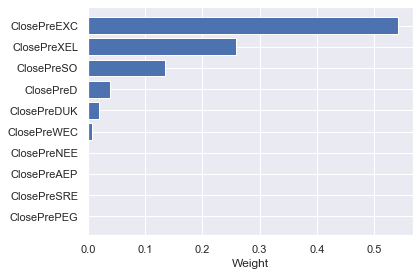

In [60]:
ef = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp = ef.min_volatility()

plot_weights(raw_weights_minvar_exp)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

Expected annual return: 31.8%
Annual volatility: 10.4%
Sharpe Ratio: 2.97


(0.31814879470195656, 0.10419062820430616, 2.9671458943097107)

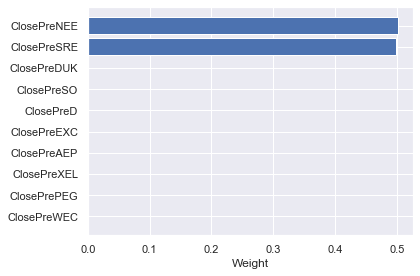

In [61]:

ef = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef.max_sharpe(risk_free_rate=0.009)

plot_weights(raw_weights_maxsharpe_exp)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

odict_keys(['ClosePreNEE', 'ClosePreDUK', 'ClosePreSO', 'ClosePreD', 'ClosePreEXC', 'ClosePreAEP', 'ClosePreSRE', 'ClosePreXEL', 'ClosePrePEG', 'ClosePreWEC'])

In [87]:
lendff= raw_weights_maxsharpe_exp.values()

In [98]:
LISTValue= list(lendff)

In [94]:
SUMpredict = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]

In [93]:
np.array([1,2,3])*np.array([4,5,6])

array([ 4, 10, 18])

In [102]:
hhhhh = np.mat(np.array(LISTValue))*np.mat(np.array(SUMpredict))

In [116]:

per1 = pd.DataFrame(hhhhh.T,columns = ['per1'])

In [117]:
per1 

per1
0         NaN
1    1.005201
2    1.006028
3    1.008606
4    1.007889
..        ...
611  1.561390
612  1.575291
613  1.583012
614  1.584088
615  1.590583

[616 rows x 1 columns]

In [118]:
#real case
#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
portfolioREAL = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)

In [123]:
PortfolioREAL_Daily_Return = portfolioREAL.pct_change()

In [125]:
PortfolioREAL_cum_returns = (PortfolioREAL_Daily_Return + 1).cumprod()

NEEClose  DUKClose   SOClose    DClose  EXCClose  AEPClose  SREClose  \
2487       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2488  0.999588  1.002216  1.002513  1.006500  1.006406  1.007389  1.007839   
2489  1.008936  1.024003  1.020101  1.023739  1.011210  1.021051  1.017746   
2490  1.021869  1.027450  1.045226  1.020913  1.014871  1.022306  1.016799   
2491  1.011758  1.015140  1.012563  1.009750  1.008236  1.013244  1.006633   
...        ...       ...       ...       ...       ...       ...       ...   
3098  1.965902  1.166174  1.390589  1.041967  0.999314  1.145825  1.087526   
3099  1.961199  1.152142  1.387163  1.043239  1.000686  1.128956  1.075551   
3100  1.971311  1.148695  1.385107  1.033065  0.996797  1.113063  1.079773   
3101  1.973192  1.153373  1.391731  1.032782  0.991078  1.115433  1.092781   
3102  1.974133  1.112999  1.399954  1.032358  0.977808  1.100655  1.083735   

      XELClose  PEGClose  WECClose  
2487       NaN       NaN       NaN  
2488  1.009365  1.007259  1.010062  
2489  1.025598  1.011079  1.019976  
2490  1.025806  1.013945  1.025303  
2491  1.012903  1.003056  1.014501  
...        ...       ...       ...  
3098  1.320291  1.133142  1.284700  
3099  1.295526  1.123400  1.260284  
3100  1.292820  1.121872  1.264575  
3101  1.296150  1.124164  1.270938  
3102  1.281374  1.118816  1.242231  

[616 rows x 10 columns]

In [129]:
kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns))*(np.mat(np.array(LISTValue)).T)

In [131]:
perreal = pd.DataFrame(kkkkkk,columns = ['PerReal'])

In [132]:
perreal 

PerReal
0         NaN
1    1.003701
2    1.013327
3    1.019342
4    1.009204
..        ...
611  1.528110
612  1.519783
613  1.526958
614  1.534385
615  1.530349

[616 rows x 1 columns]

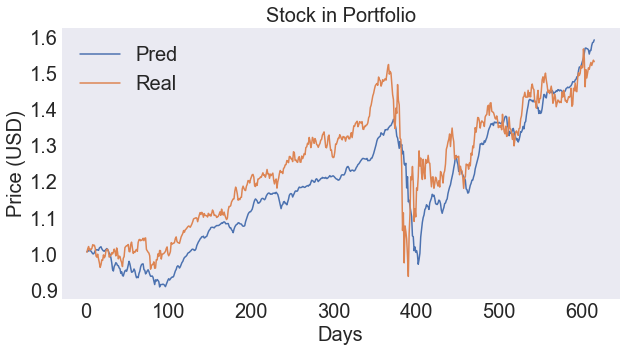

In [134]:
plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(per1['per1'])

plt.plot(perreal['PerReal'])


plt.legend(['Pred','Real'], loc='upper left', fontsize=20)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('Stock in Portfolio', fontsize=20)
plt.show()

In [74]:
# calculate daily and annual returns of the stocks
returns_daily =TESTDailyReturn
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

selected = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']


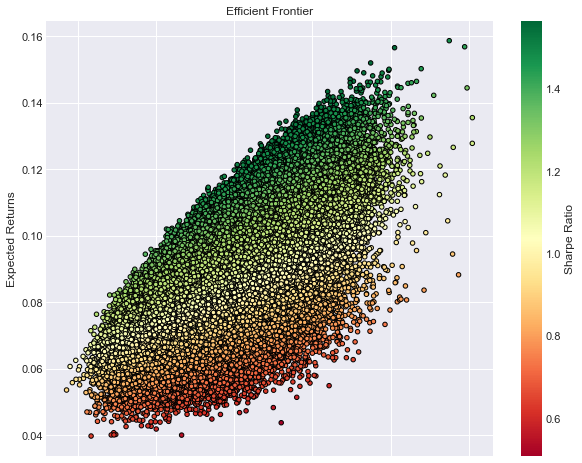

In [75]:
# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 1000000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


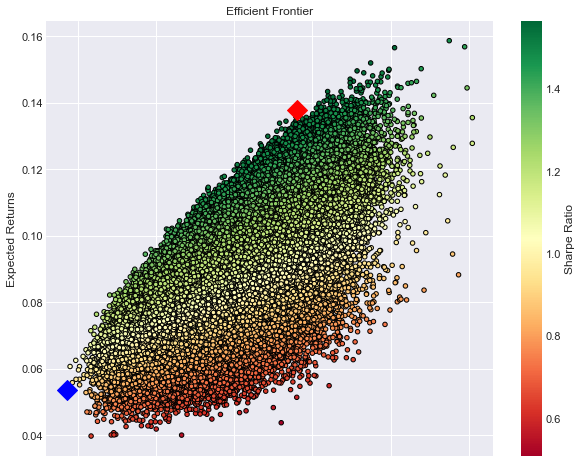

In [76]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [ ]:


sns.set()

fig, ax = plt.subplots(figsize = [15,10])

sns.lineplot(x = vol_ef, y = ret_ef, label = "Efficient Frontier", ax = ax)
sns.scatterplot(x = [min_vol_vol], y = [min_vol_ret], ax = ax, label = "Minimum Variance Portfolio", color = "purple", s = 100)
sns.scatterplot(x = [max_sharpe_vol], y = [max_sharpe_ret], ax = ax, label = "Maximum Sharpe Portfolio", color = "green", s = 100)
sns.lineplot(x = [0, max_sharpe_vol, 1], y = [0.009, max_sharpe_ret, 3.096], label = "Capital Market Line", ax = ax, color = "r")

ax.set(xlim = [0, 0.4])
ax.set(ylim = [0, 1])
ax.set_xlabel("Volatility")
ax.set_ylabel("Mean Return")
plt.legend(fontsize='large')
plt.title("Efficient Frontier", fontsize = '20')

ax.figure.savefig("EffFront_big.png", dpi = 300)

2